## Handling unbalanced data
 Credit card Kaggle-data


In [1]:
import numpy as np 
import pandas as pd 
import sklearn 
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from pylab import rcParams 
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
lables     = ['Normal', 'Fraud']

In [3]:
df = pd.read_csv('creditcard.csv')
df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Create independent and dependent features 
The dependent feature is 'Class'

if Class == 0:
    The transaction is normal
else:
    The transaction is fraudlent 
        


# Filter the features except the 'Class'


In [5]:
columns = df.columns.tolist()
columns = [c for c in columns if c not in ['Class']]                    

# store the dependent variable as 'target'


In [6]:
target = 'Class'     

# Introduce a random state 

In [7]:
state = np.random.RandomState(42)
x = df[columns] # set the independent columns as x 
y = df[target] # set dependent column as y 

x_oulier = state.uniform(low=0, high=1, size=(x.shape[0],x.shape[1])) # Check the oulier 

## Exploratory data analysis 


In [8]:
df.isnull().values.any() # Check any null value 

False

Text(0.5, 1.0, 'Transaction class')

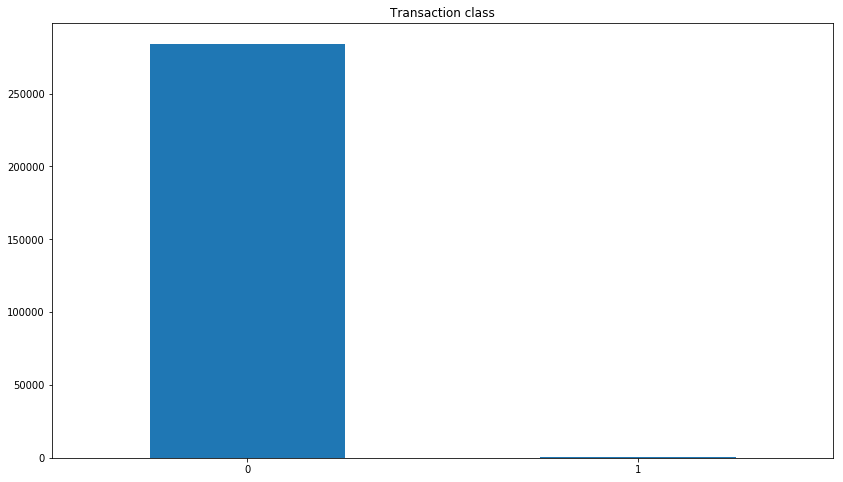

In [9]:
count_classes = pd.value_counts(df['Class'], sort=True)
count_classes.plot(kind = 'bar', rot=0)
plt.title('Transaction class')

From the above plot we observe that the data is not balanced between the fraud and normal transaction 

Get the fraud and normal data from the original data frame i.e., df 

In [10]:
fraud  = df[df['Class']==1]
normal = df[df['Class']==0]
print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [11]:
#!pip3 install imblearn
#import imblearn
from imblearn.under_sampling import NearMiss

# Impliment undersampling 

- To balance the data between the fraud and normal transaction

In [12]:
nm = NearMiss()
x_res, y_res = nm.fit_sample(x,y)
x_res.shape

(984, 30)

In [13]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


# Similarly one can also apply upsampling 

Implememnting oversampling to handle missing value we use a library called SMOTETomek

In [14]:
from imblearn.combine import SMOTETomek

In [15]:
smk = SMOTETomek()
x_ures, y_ures = smk.fit_sample(x,y)

In [16]:
x_ures.shape

(567468, 30)

In [17]:
# print the original and resampled data 
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_ures)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 283734, 1: 283734})


# Use RandomOverSampler 

In [21]:
from imblearn.over_sampling import RandomOverSampler
rov = RandomOverSampler() # the number of samples are equall ratio = 1

x_rov, y_rov = rov.fit_sample(x,y)

In [22]:
x_rov.shape

(568630, 30)